## Plot weight matrices example 
* https://nest-simulator.readthedocs.io/en/latest/auto_examples/plot_weight_matrices.html

In [1]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import nest
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0-post0.dev0
 Built: Oct  2 2024 11:54:50

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



[admin:1814125] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.admin.1000/jf.0/1520107520/shared_mem_cuda_pool.admin could be created.
[admin:1814125] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 


* Note the use of “post-pre” notation when referring to synaptic connections. As a matter of convention in computational neuroscience, we refer to the connection from inhibitory to excitatory neurons (I->E) as EI (post-pre) and connections from excitatory to inhibitory neurons (E->I) as IE (post-pre).

In [17]:
def plot_weight_matrices(E_neurons, I_neurons):
    W_EE = np.zeros([len(E_neurons), len(E_neurons)]) # E to E
    W_EI = np.zeros([len(I_neurons), len(E_neurons)]) # I to E
    W_IE = np.zeros([len(E_neurons), len(I_neurons)]) # E to I
    W_II = np.zeros([len(I_neurons), len(I_neurons)]) # I to I
    print("Extracting connection weights...")
    print("W_EE shape: ", W_EE.shape)
    print("W_EI shape: ", W_EI.shape)
    print("W_IE shape: ", W_IE.shape)
    print("W_II shape: ", W_II.shape)

    a_EE = nest.GetConnections(E_neurons, E_neurons)

    # We extract the value of the connection weight for all the connections between these populations
    c_EE = a_EE.weight

    # Repeat the two previous steps for all other connection types
    a_EI = nest.GetConnections(I_neurons, E_neurons)
    c_EI = a_EI.weight # I to E
    a_IE = nest.GetConnections(E_neurons, I_neurons)
    c_IE = a_IE.weight
    a_II = nest.GetConnections(I_neurons, I_neurons)
    c_II = a_II.weight

    # We now iterate through the range of all connections of each type.
    # To populate the corresponding weight matrix, we begin by identifying
    # the source-node_id (by using .source) and the target-node_id.
    # For each node_id, we subtract the minimum node_id within the corresponding
    # population, to assure the matrix indices range from 0 to the size of
    # the population.

    # After determining the matrix indices [i, j], for each connection
    # object, the corresponding weight is added to the entry W[i,j].
    # The procedure is then repeated for all the different connection types.
    a_EE_src = a_EE.source
    a_EE_trg = a_EE.target
    a_EI_src = a_EI.source
    a_EI_trg = a_EI.target
    a_IE_src = a_IE.source
    a_IE_trg = a_IE.target
    a_II_src = a_II.source
    a_II_trg = a_II.target

    min_E = min(E_neurons.tolist())
    min_I = min(I_neurons.tolist())

    for idx in range(len(a_EE)):
        W_EE[a_EE_src[idx] - min_E, a_EE_trg[idx] - min_E] += c_EE[idx]
    for idx in range(len(a_EI)):
        W_EI[a_EI_src[idx] - min_I, a_EI_trg[idx] - min_E] += c_EI[idx]
    for idx in range(len(a_IE)):
        W_IE[a_IE_src[idx] - min_E, a_IE_trg[idx] - min_I] += c_IE[idx]
    for idx in range(len(a_II)):
        W_II[a_II_src[idx] - min_I, a_II_trg[idx] - min_I] += c_II[idx]

    fig = plt.figure()
    fig.suptitle("Weight matrices", fontsize=14)
    gs = gridspec.GridSpec(4, 4)
    ax1 = plt.subplot(gs[:-1, :-1])
    ax2 = plt.subplot(gs[:-1, -1])
    ax3 = plt.subplot(gs[-1, :-1])
    ax4 = plt.subplot(gs[-1, -1])

    plt1 = ax1.imshow(W_EE, cmap="jet")

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", "5%", pad="3%")
    plt.colorbar(plt1, cax=cax)

    ax1.set_title("$W_{EE}$")
    ax1.set_xlabel("Source")
    ax1.set_ylabel("Target")
    plt.tight_layout()

    plt2 = ax2.imshow(W_IE)
    plt2.set_cmap("jet")
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", "5%", pad="3%")
    plt.colorbar(plt2, cax=cax)
    ax2.set_title("$W_{EI}$")
    ax2.set_xlabel("Source")
    ax2.set_ylabel("Target")
    plt.tight_layout()

    plt3 = ax3.imshow(W_EI)
    plt3.set_cmap("jet")
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes("right", "5%", pad="3%")
    plt.colorbar(plt3, cax=cax)
    ax3.set_title("$W_{IE}$")
    ax3.set_xlabel("Source")
    ax3.set_ylabel("Target")
    plt.tight_layout()

    plt4 = ax4.imshow(W_II)
    plt4.set_cmap("jet")
    divider = make_axes_locatable(ax4)
    cax = divider.append_axes("right", "5%", pad="3%")
    plt.colorbar(plt4, cax=cax)
    ax4.set_title("$W_{II}$")
    ax4.set_xlabel("Source")
    ax4.set_ylabel("Target")
    plt.tight_layout()

Extracting connection weights...
Oct 08 11:11:24 ConnectionManager [Warning]: 
    New connections creat
W_EE shape:  (100, 100)
W_EI shape:  (25, 100)
W_IE shape:  (100, 25)
W_II shape:  (25, 25)
ed, connection descriptors previously obtained using 
    'GetConnections' are now invalid.


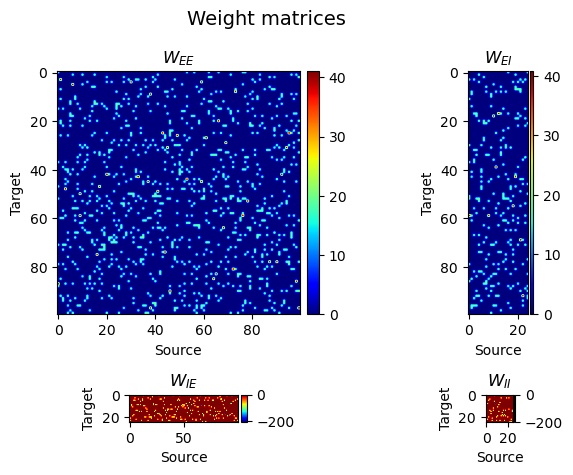

In [18]:
# Create populations
NE = 100  # number of excitatory neurons
NI = 25  # number of inhibitory neurons
E_neurons = nest.Create("iaf_psc_alpha", NE)
I_neurons = nest.Create("iaf_psc_alpha", NI)

# Definition of connectivity parameters
CE = int(0.1 * NE)  # number of excitatory synapses per neuron
CI = int(0.1 * NI)  # number of inhibitory synapses per neuron

delay = 1.5  # synaptic delay in ms
g = 5.0  # ratio inhibitory weight/excitatory weight

w_ex = nest.random.normal(20, 0.5)
w_in = -g * w_ex

# Create connections
nest.Connect(
    E_neurons,
    E_neurons + I_neurons,
    conn_spec={"rule": "fixed_indegree", "indegree": CE},
    syn_spec={"synapse_model": "static_synapse", "weight": w_ex, "delay": delay},
)

nest.Connect(
    I_neurons,
    E_neurons + I_neurons,
    conn_spec={"rule": "fixed_indegree", "indegree": CI},
    syn_spec={"synapse_model": "static_synapse", "weight": w_in, "delay": delay},
)

# Use plotting function
plot_weight_matrices(E_neurons, I_neurons)

plt.show()